<a href="https://colab.research.google.com/github/Dasika-Vaishnavi/Project-Dharma/blob/main/Vakeel_Saab_ML_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP and Multi-category prediction.
https://realpython.com/python-keras-text-classification/

## 1) Data Preprocessing

In [20]:
import numpy as np 
import pandas as pd 

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import csv

In [22]:
path = '/content/legal_text_classification.csv'
df = pd.read_csv(path)
df.rename(columns=df.iloc[0]).drop(df.index[0])

ParserError: ignored

In [26]:
df

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...
...,...,...,...,...
993,Case1012,referred to,R v Dudley and Stephens (1884) 14 QBD 273,can be no doubt that the Criminal Code was int...
994,Case1013,referred to,R v Loughnan [1981] VR 443,"common law defence of necessity, from which th..."
995,Case1014,considered,R v Oblach [2005] NSWCCA 440 ; (2005) 65 NSWLR 75,can be no doubt that the Criminal Code was int...
996,Case1015,referred to,Re Centennial Coal Co Ltd (2006) 226 ALR 341,meaning of the word 'contravention' is critica...


In [23]:
df.head()

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [24]:
df.rename(columns=df.iloc[0]).drop(df.index[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   case_id       998 non-null    object
 1   case_outcome  998 non-null    object
 2   case_title    998 non-null    object
 3   case_text     994 non-null    object
dtypes: object(4)
memory usage: 31.3+ KB


In [25]:
df.head()

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [27]:
df.isnull().sum()

case_id         0
case_outcome    0
case_title      0
case_text       4
dtype: int64

In [28]:
df['case_outcome'].unique()

array(['cited', 'applied', 'followed', 'referred to', 'related',
       'considered', 'discussed', 'distinguished', 'affirmed'],
      dtype=object)

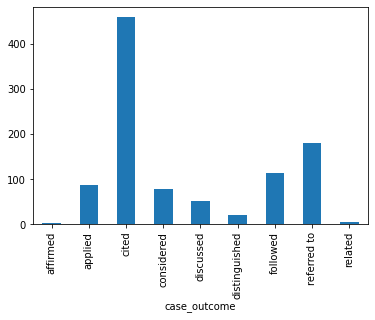

In [29]:
df.groupby('case_outcome')['case_id'].count().plot.bar()

In [30]:
df=df.dropna(how='any')

In [31]:
df

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...
...,...,...,...,...
992,Case1011,referred to,R v Ampi Hungan [2000] NTSC 84,"this conclusion, the Migration Act has neverth..."
993,Case1012,referred to,R v Dudley and Stephens (1884) 14 QBD 273,can be no doubt that the Criminal Code was int...
994,Case1013,referred to,R v Loughnan [1981] VR 443,"common law defence of necessity, from which th..."
995,Case1014,considered,R v Oblach [2005] NSWCCA 440 ; (2005) 65 NSWLR 75,can be no doubt that the Criminal Code was int...


# 2) What words are used in each case outcomes

In [32]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
  import nltk
  nltk.download('stopwords')
  nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import string

list_stopwords = set(stopwords.words('english'))
df2= df[['case_text']]
df2['case_text'] = df2['case_text'].str.lower()
df2['case_text'] = df2['case_text'].apply(word_tokenize)
df2['case_text'] = df2['case_text'].apply(lambda x: [word for word in x if word not in list_stopwords])
df2['case_text'] = df2['case_text'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df2['case_text'] = df2['case_text'].apply(lambda x : [word for word in x if len(word) > 1])

In [35]:
df2['case_outcome']=df['case_outcome']

In [36]:
df.rename(columns=df.iloc[0]).drop(df.index[0])
df2

,case_text,case_outcome
0,"[ordinarily, discretion, exercised, costs, fol...",cited
1,"[general, principles, governing, exercise, dis...",cited
2,"[ordinarily, discretion, exercised, costs, fol...",cited
3,"[general, principles, governing, exercise, dis...",cited
4,"[preceding, general, principles, inform, exerc...",cited
...,...,...
992,"[conclusion, migration, act, nevertheless, con...",referred to
993,"[doubt, criminal, code, intended, provide, pri...",referred to
994,"[common, law, defence, necessity, defence, sud...",referred to
995,"[doubt, criminal, code, intended, provide, pri...",considered


In [37]:
df['case_outcome'].unique()

array(['cited', 'applied', 'followed', 'referred to', 'related',
       'considered', 'discussed', 'distinguished', 'affirmed'],
      dtype=object)

In [38]:
df2_cited=df2[df2['case_outcome']=='cited']
df2_applied=df2[df2['case_outcome']=='applied']
df2_followed=df2[df2['case_outcome']=='followed']
df2_referred=df2[df2['case_outcome']=='referred to']
df2_related=df2[df2['case_outcome']=='related']
df2_considered=df2[df2['case_outcome']=='considered']
df2_discussed=df2[df2['case_outcome']=='discussed']
df2_distinguished=df2[df2['case_outcome']=='distinguished']
df2_affirmed=df2[df2['case_outcome']=='affirmed']
df2_approved=df2[df2['case_outcome']=='approved']

In [39]:
df3_cited=df2_cited['case_text'].explode()
df3_applied=df2_applied['case_text'].explode()
df3_followed=df2_followed['case_text'].explode()
df3_referred=df2_referred['case_text'].explode()
df3_related=df2_related['case_text'].explode()
df3_considered=df2_considered['case_text'].explode()
df3_discussed=df2_discussed['case_text'].explode()
df3_distinguished=df2_distinguished['case_text'].explode()
df3_affirmed=df2_affirmed['case_text'].explode()
df3_approved=df2_approved['case_text'].explode()

In [40]:
df3_cited=pd.DataFrame(df3_cited)
df3_applied=pd.DataFrame(df3_applied)
df3_followed=pd.DataFrame(df3_followed)
df3_referred=pd.DataFrame(df3_referred)
df3_related=pd.DataFrame(df3_related)
df3_considered=pd.DataFrame(df3_considered)
df3_discussed=pd.DataFrame(df3_discussed)
df3_distinguished=pd.DataFrame(df3_distinguished)
df3_affirmed=pd.DataFrame(df3_affirmed)
df3_approved=pd.DataFrame(df3_approved)

In [41]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import squarify

In [43]:
df2_total=df2['case_text'].explode()
df2_total=pd.DataFrame(df2_total)

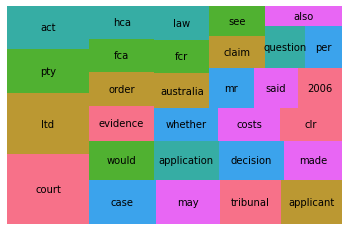

In [44]:
df2_total=pd.DataFrame(df2_total.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df2_total=df2_total.rename(columns={'case_text': 'num'})

x = df2_total['num']
label = df2_total.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

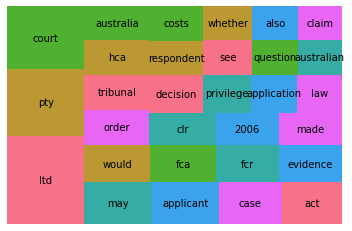

In [45]:
df3_cited=pd.DataFrame(df3_cited.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_cited=df3_cited.rename(columns={'case_text': 'num'})

x = df3_cited['num']
label = df3_cited.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

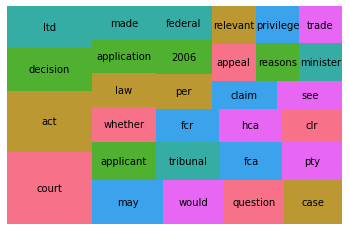

In [46]:
df3_applied=pd.DataFrame(df3_applied.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_applied=df3_applied.rename(columns={'case_text': 'num'})

x = df3_applied['num']
label = df3_applied.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

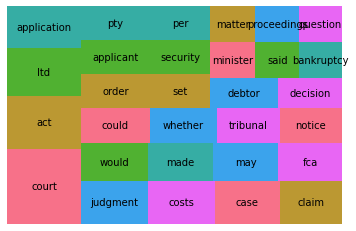

In [47]:
df3_followed=pd.DataFrame(df3_followed.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_followed=df3_followed.rename(columns={'case_text': 'num'})

x = df3_followed['num']
label = df3_followed.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

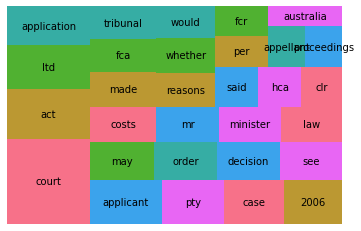

In [48]:
df3_referred=pd.DataFrame(df3_referred.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_referred=df3_referred.rename(columns={'case_text': 'num'})

x = df3_referred['num']
label = df3_referred.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

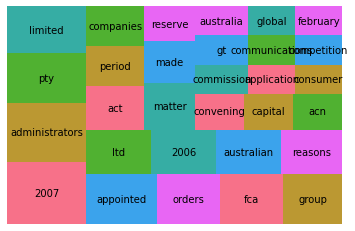

In [49]:
df3_related=pd.DataFrame(df3_related.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_related=df3_related.rename(columns={'case_text': 'num'})

x = df3_related['num']
label = df3_related.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

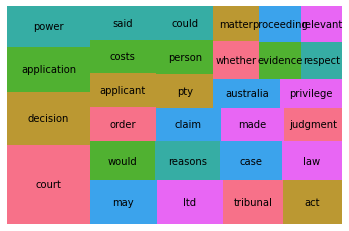

In [50]:
df3_considered=pd.DataFrame(df3_considered.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_considered=df3_considered.rename(columns={'case_text': 'num'})

x = df3_considered['num']
label = df3_considered.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

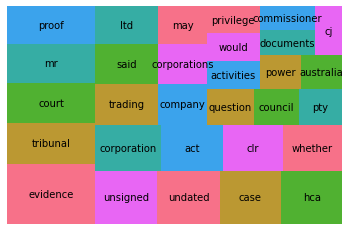

In [51]:
df3_discussed=pd.DataFrame(df3_discussed.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_discussed=df3_discussed.rename(columns={'case_text': 'num'})

x = df3_discussed['num']
label = df3_discussed.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

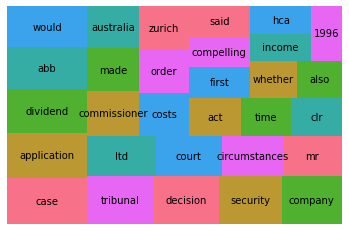

In [52]:
df3_distinguished=pd.DataFrame(df3_distinguished.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_distinguished=df3_distinguished.rename(columns={'case_text': 'num'})

x = df3_distinguished['num']
label = df3_distinguished.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

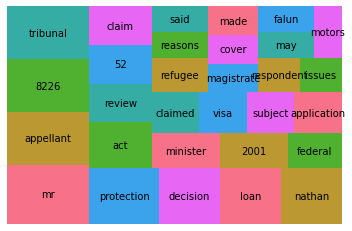

In [53]:
df3_affirmed=pd.DataFrame(df3_affirmed.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_affirmed=df3_affirmed.rename(columns={'case_text': 'num'})

x = df3_affirmed['num']
label = df3_affirmed.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

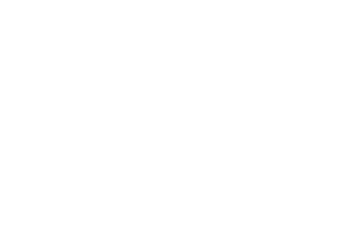

In [54]:
df3_approved=pd.DataFrame(df3_approved.groupby('case_text')['case_text'].count().sort_values(ascending=False).head(30))
df3_approved=df3_approved.rename(columns={'case_text': 'num'})

x = df3_approved['num']
label = df3_approved.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

# 3) Multi-categories prediction trial

In [55]:
df['case_outcome'].unique()

array(['cited', 'applied', 'followed', 'referred to', 'related',
       'considered', 'discussed', 'distinguished', 'affirmed'],
      dtype=object)

In [56]:
df['case_outcome']=df['case_outcome'].replace({'cited':1, 'applied':2,'followed':3,'referred to':4,'related':5,'considered':6,'discussed':7,
              'distinguished':8,'affirmed':9,'approved':10})

In [57]:
from sklearn.model_selection import train_test_split

sentences = df['case_text'].values
y = df['case_outcome'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

In [59]:
from keras.models import Sequential
from keras import layers

In [61]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [63]:
input_dim = X_train.shape[1]

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

In [64]:
model.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                98250     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 98,261
Trainable params: 98,261
Non-trainable params: 0
_________________________________________________________________


In [65]:
from keras.backend import clear_session
clear_session()

In [66]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [67]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

8/8 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4337
Train loss: 0.0
Train accuracy: 0.46979865431785583
Test loss: 0.0
Test accuracy: 0.4337349534034729
